# Here we are going to predict whether a person will get stroke or not based on some input parameters.

Class 0: 41295
Class 1: 643
Proportion: 64.22 : 1


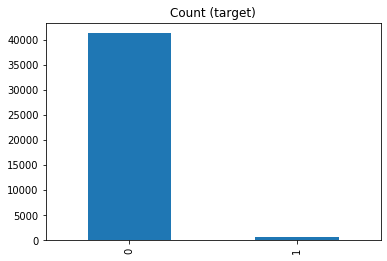

In [3]:
import numpy as np
import pandas as pd
import matplotlib 

df_train = pd.read_csv('STROKE.csv')
df_train=df_train.dropna()
target_count = df_train.stroke.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

# We can able to see unbalanced data. Here most of the rows from the dataset are from class 0 (no stroke).

In [4]:
from xgboost import XGBClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

labels = df_train.columns[1:-1]

X = df_train[labels]
y = df_train['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.58%


C:\Users\msmit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# We are getting 98.5% accuracy when we fit into xgboost.

Confusion matrix:
 [[8269    0]
 [ 119    0]]


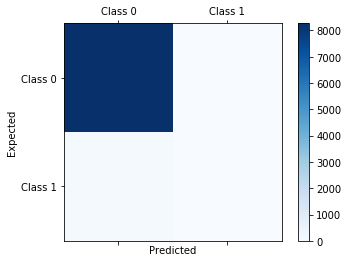

In [5]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)

print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# But confusion matrix says that this model is not good as it predicts only class 0 (No stroke). This is due to the unbalanced data.

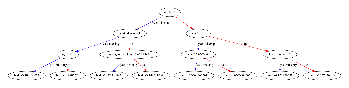

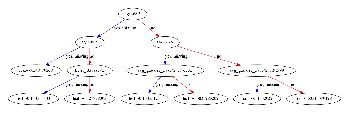

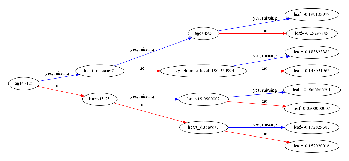

In [6]:
plot_tree(model)
plt.show()
plot_tree(model, num_trees=4)
plt.show()
plot_tree(model, num_trees=0, rankdir='LR')
plt.show()

# We can able to see the xgboost classification tree above

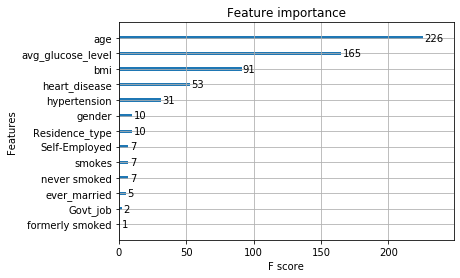

In [7]:
from xgboost import plot_importance
plot_importance(model)

# Above says the important features for predicting the result using xgboost

In [8]:
count_class_0, count_class_1 = df_train.stroke.value_counts()

df_class_0 = df_train[df_train['stroke'] == 0]
df_class_1 = df_train[df_train['stroke'] == 1]

# Here we are splitting dataframe based on the target variable. It splits into class 0 and class 1 dataframe. 

Random under-sampling:
1    643
0    643
Name: stroke, dtype: int64


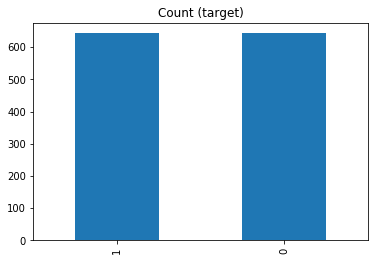

In [9]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.stroke.value_counts())

df_test_under.stroke.value_counts().plot(kind='bar', title='Count (target)');

# Now we used Random Under Sampling method to make the dataset balanced. So, this helps in increasing the accuracy of the model.

Random over-sampling:
1    41295
0    41295
Name: stroke, dtype: int64


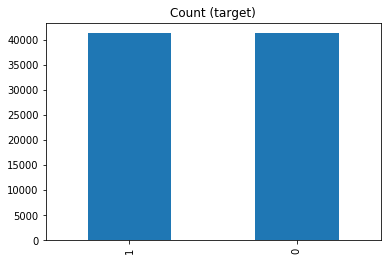

In [10]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.stroke.value_counts())

df_test_over.stroke.value_counts().plot(kind='bar', title='Count (target)');

# We are even using Random Over Sampling which is a another method used for making the dataset balanced. Even this helps in increasing the accuracy.

In [27]:
# Remove 'id' and 'target' columns
labels = df_train.columns[1:-1]

X = df_test_under[labels]
y = df_test_under['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.19%


C:\Users\msmit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Here we are using Random Under Sampled data for xg boost. We are getting 75.19%

Confusion matrix:
 [[ 83  40]
 [ 24 111]]


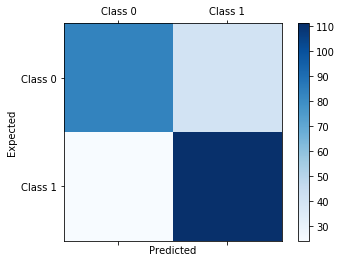

In [28]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)

print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# When we see the confusion matrix. It predicts both class 0 and class 1 with accuracy of ablout 75.19%. This is due to the balanced data which we made using the above method. 

In [13]:
labels = df_train.columns[1:-1]

X = df_test_over[labels]
y = df_test_over['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.21%


C:\Users\msmit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Here we are having 81.21% accuracy when we use Random Over Sampled data to predict stroke.

Confusion matrix:
 [[6399 1945]
 [1158 7016]]


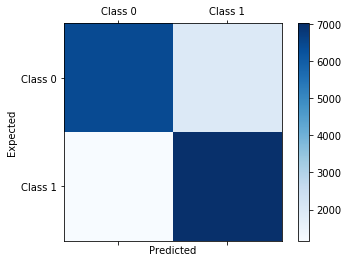

In [14]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#conf_mat = confusion_matrix(y_true=y_train, y_pred=y_pred)

print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Here confusion matrix clearly says the improvement in prediction when we use Over Sampled Data for prediction. We get around 6 % increase in accuracy when we use this method. 

In [15]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

# Above function helps in plotting 2D data. This function will be helpfull for visualization.

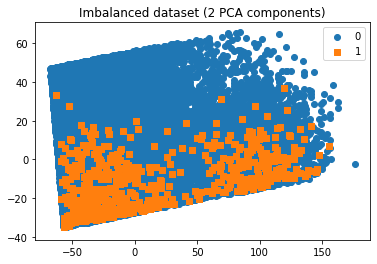

In [16]:
from sklearn.decomposition import PCA

labels = df_train.columns[1:-1]

X = df_test_over[labels]
y = df_test_over['stroke']


pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

# Now, We use PCA (Principle Component Analysis) which is the method used for reducing the dimensions or features in dataset. Above is the 2D plot for Over Sampled Data. 

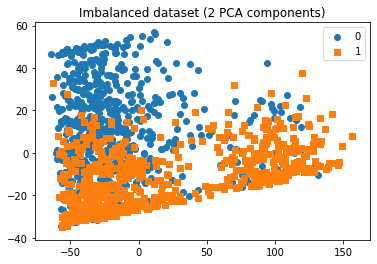

In [17]:
# Remove 'id' and 'target' columns
labels = df_train.columns[1:-1]

X = df_test_under[labels]
y = df_test_under['stroke']

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

# Here we are again using PCA method and plotting Under Sampled Data.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

labels = df_train.columns[1:-1]

X = df_test_under[labels]
y = df_test_under['stroke']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
1028/1028 [==============================] - 0s 453us/step - loss: 0.6930 - accuracy: 0.4971
Epoch 2/100
1028/1028 [==============================] - 0s 119us/step - loss: 0.6807 - accuracy: 0.5545
Epoch 3/100
1028/1028 [==============================] - 0s 108us/step - loss: 0.6179 - accuracy: 0.7335
Epoch 4/100
1028/1028 [==============================] - 0s 107us/step - loss: 0.5675 - accuracy: 0.7626
Epoch 5/100
1028/1028 [==============================] - 0s 105us/step - loss: 0.5464 - accuracy: 0.7811
Epoch 6/100
1028/1028 [==============================] - 0s 107us/step - loss: 0.5338 - accuracy: 0.7831
Epoch 7/100
1028/1028 [==============================] - 0s 111us/step - loss: 0.5228 - accuracy: 0.7802
Epoch 8/100
1028/1028 [==============================] - 0s 110us/step - loss: 0.5147 - accuracy: 0.7811
Epoch 9/100
1028/1028 [==============================] - 0s 110us/step - loss: 0.5076 - accuracy: 0.7850
Epoch 10/100
1028/1028 [==============================]

1028/1028 [==============================] - 0s 112us/step - loss: 0.4519 - accuracy: 0.7899
Epoch 79/100
1028/1028 [==============================] - 0s 111us/step - loss: 0.4516 - accuracy: 0.7879
Epoch 80/100
1028/1028 [==============================] - 0s 99us/step - loss: 0.4518 - accuracy: 0.7879
Epoch 81/100
1028/1028 [==============================] - 0s 97us/step - loss: 0.4517 - accuracy: 0.7870
Epoch 82/100
1028/1028 [==============================] - 0s 103us/step - loss: 0.4509 - accuracy: 0.7899
Epoch 83/100
1028/1028 [==============================] - 0s 104us/step - loss: 0.4509 - accuracy: 0.7889
Epoch 84/100
1028/1028 [==============================] - 0s 107us/step - loss: 0.4508 - accuracy: 0.7889
Epoch 85/100
1028/1028 [==============================] - 0s 139us/step - loss: 0.4508 - accuracy: 0.7928
Epoch 86/100
1028/1028 [==============================] - 0s 128us/step - loss: 0.4507 - accuracy: 0.7909
Epoch 87/100
1028/1028 [==============================] - 0s 

# We are using ANN (Artificial Neural Network) for predicting the stroke using Under Sampled Data with 3 hidden layers and final activation function as a sigmoid function for predicting the output. We use adam optimizer and binary crossentropy as a loss function. We train 100 epochs with 10 as a batch size.

In [24]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, y_pred, target_names = ['No Stroke (Class 0)','Stroke (Class 1)']))


[[ 89  42]
 [ 17 110]]
                    precision    recall  f1-score   support

No Stroke (Class 0       0.84      0.68      0.75       131
  Stroke (Class 1)       0.72      0.87      0.79       127

       avg / total       0.78      0.77      0.77       258



# We can see the confusion matrix and also precision,recall and fi score for class 0, class 1 and overall model scores above for Under Sampled Data. 

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

labels = df_train.columns[1:-1]

X = df_test_over[labels]
y = df_test_over['stroke']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)



Epoch 1/100
66072/66072 [==============================] - 7s 105us/step - loss: 0.4603 - accuracy: 0.7868
Epoch 2/100
66072/66072 [==============================] - 7s 104us/step - loss: 0.4438 - accuracy: 0.7976
Epoch 3/100
66072/66072 [==============================] - 7s 99us/step - loss: 0.4398 - accuracy: 0.7989
Epoch 4/100
66072/66072 [==============================] - 7s 106us/step - loss: 0.4374 - accuracy: 0.8006
Epoch 5/100
66072/66072 [==============================] - 7s 101us/step - loss: 0.4359 - accuracy: 0.8023
Epoch 6/100
66072/66072 [==============================] - 7s 110us/step - loss: 0.4347 - accuracy: 0.8038
Epoch 7/100
66072/66072 [==============================] - 8s 122us/step - loss: 0.4329 - accuracy: 0.8047
Epoch 8/100
66072/66072 [==============================] - 7s 112us/step - loss: 0.4305 - accuracy: 0.8054
Epoch 9/100
66072/66072 [==============================] - 7s 111us/step - loss: 0.4288 - accuracy: 0.8058
Epoch 10/100
66072/66072 [============

Epoch 77/100
66072/66072 [==============================] - 7s 109us/step - loss: 0.3924 - accuracy: 0.8077
Epoch 78/100
66072/66072 [==============================] - 7s 108us/step - loss: 0.3921 - accuracy: 0.8083
Epoch 79/100
66072/66072 [==============================] - 7s 111us/step - loss: 0.3935 - accuracy: 0.8078
Epoch 80/100
66072/66072 [==============================] - 7s 109us/step - loss: 0.3923 - accuracy: 0.80780s - loss:
Epoch 81/100
66072/66072 [==============================] - 8s 117us/step - loss: 0.3923 - accuracy: 0.8084
Epoch 82/100
66072/66072 [==============================] - 7s 107us/step - loss: 0.3927 - accuracy: 0.8070
Epoch 83/100
66072/66072 [==============================] - 7s 110us/step - loss: 0.3929 - accuracy: 0.8070
Epoch 84/100
66072/66072 [==============================] - 7s 108us/step - loss: 0.3922 - accuracy: 0.8073
Epoch 85/100
66072/66072 [==============================] - 7s 111us/step - loss: 0.3918 - accuracy: 0.8074
Epoch 86/100
66072

# We are using ANN (Artificial Neural Network) for predicting the stroke using Over Sampled Data with 2 hidden layers and final activation function as a sigmoid function for predicting the output. We use adam optimizer and binary crossentropy as a loss function. We train 100 epochs with 10 as a batch size.

In [26]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, y_pred, target_names = ['No Stroke (Class 0)','Stroke (Class 1)']))


[[5711 2412]
 [ 709 7686]]
                     precision    recall  f1-score   support

No Stroke (Class 0)       0.89      0.70      0.79      8123
   Stroke (Class 1)       0.76      0.92      0.83      8395

        avg / total       0.82      0.81      0.81     16518



# We can see the confusion matrix and also precision,recall and fi score for class 0, class 1 and overall model scores above for Over Sampled Data.

# When we compare all the model prediction and its accuracies. We can see the ANN (Artificial Neural Network Model) using Over Sampled Data have more accuracy compared to other.

# These are our works and conclusion based on the stroke dataset.